# Health Trends in Cities with High and Low Rates of Depression
### Contributors:
- Lan "Alice" Nguyen
- Kent Andrews
- Esther Baumgartner

### Data source
The 500 Cities Project was launched by the Centers for Disease Control and Prevention (CDC) in partnership with the Robert Wood Johnson Foundation (RWJF) and CDC Foundation.
This dataset includes estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9). All participants in this survey are 18 years old or older.
We selected 3 unhealthy behaviors, 6 heath outcomes and 1 preventive service for this analysis.
Link for more information: https://www.cdc.gov/places/

### Overview:
This study utilized data from the 500 Cities Project APIs. These are on-going surveys conducted by the CDC in 500 cities across the US. All participants are 18 years old or older.The primary focus of our study was to explore the association between depression and three unhealthy behaviors: binge drinking, insufficient sleep (less than 7 hours per day), and physical inactivity. We then made a comparison in health outcomes between the top 5 happiest cities and top 5 most depressed cities. We also identified the top 10 least depressed states and bottom 10 most depressed states.

### Analysis:
Mental Health Data: In this survey, participants were asked if their mental health was not good for more than 14 days in the last 30 days. From the map, we can see that cities with higher rates of depression were concentrated along the east coast, some parts of the midwest, and areas near the Pacific Ocean on the west coast. Less-depressed cities were primarily situated in the central region of the map.

Depression vs Binge Drinking: The binge drinking data include participants who report having five or more drinks (for men) or four or more drink (for women) on an occasion in the past 30 days. Cities that have the highest binge drinking population are in the midwest, west coast and cities near the Atlantic ocean. Statistical analysis revealed a weak correlation (r-value: -0.37) between depression and binge drinking, indicating a minimal connection between mental well-being and alcohol consumption habits.

Depression vs Sleeping Behaviour: Participants were asked to report if they usually getting insufficient sleep (less than 7 hours). From the map, we can see that people from the east coast tend to sleep less than people from the west coast. The moderate correlation coefficient (r-value: 0.64) emphasized a notable link between depression and sleep deprivation. The analysis highlighted that cities with higher depression rates also exhibited a higher prevalence of insufficient sleep (less than 7 hours per day).

Depression vs Physical Inactivity: In this survey, participants were asked: "During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?" to measure physical inactivity. From the map, we can see that people from the west coast are a lot more active than the east coast. There is a strong correlation (r-value: 0.73) between depression and physical inactivity. This implies that cities with higher depression rates were more likely to have a populace with limited leisure time for physical activities.

The study further examined the top 5 least-depressed cities in the United States. They are: Plymouth, Sunnyvale, Fremont, Johns Creek and San Ramon. The top 5 most depressed cities are: Flint, Reading, Camden, Youngstown, and Detroit. When comparing the 2 groups, we see that people from more depressed cities have much worse health outcomes. Not only do they have worse mental heath, but are also more likely to have diabetes, high blood pressure, kidney disease, or cancer. Their population is also less likely to have health insurance. Policy makers of these cities should find a way to enhance the overall well-being and quality of life of their residents.

### Conclusion:
In summary, our analysis of data from the CDC 500 Cities Project APIs has showed some connection between depression and unhealthy behaviors. Overall there is a weak correlation between depression and binge drinking. However, there are notable connections between depression and insufficient sleep and physical inactivity. Futher investigation also shows that cities with better mental health also has better overanll physical health. 


In [1]:
# pip install selenium
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
import json

In [2]:
# Import mental health data
mental_base_url = "https://data.cdc.gov/resource/i2ek-k3pa.json?"
params = {
    "GeographicLevel" : "City",
    "DataValueTypeID" : "AgeAdjPrv"
}
mental_data = requests.get(mental_base_url, params = params).json()
pprint(mental_data)

[{'category': 'Health Outcomes',
  'categoryid': 'HLTHOUT',
  'cityfips': '0150000',
  'cityname': 'Mobile',
  'data_value': '16.3',
  'data_value_type': 'Age-adjusted prevalence',
  'data_value_unit': '%',
  'datasource': 'BRFSS',
  'datavaluetypeid': 'AgeAdjPrv',
  'geographiclevel': 'City',
  'geolocation': {'human_address': '{"address": "", "city": "", "state": "", '
                                   '"zip": ""}',
                  'latitude': '30.6776248648',
                  'longitude': '-88.1184482714',
                  'needs_recoding': False},
  'high_confidence_limit': '16.5',
  'low_confidence_limit': '16.2',
  'measure': 'Mental health not good for >=14 days among adults aged >=18 '
             'Years',
  'measureid': 'MHLTH',
  'populationcount': '195111',
  'short_question_text': 'Mental Health',
  'stateabbr': 'AL',
  'statedesc': 'Alabama',
  'uniqueid': '0150000',
  'year': '2017'},
 {'category': 'Health Outcomes',
  'categoryid': 'HLTHOUT',
  'cityfips': '0427400

In [18]:
# Create the mental heath dataframe
mental_df = pd.DataFrame()
mental_df['City Name'] = ""
mental_df['State'] = ""
mental_df['Lat'] = ""
mental_df['Lon'] = ""
mental_df['% Depress'] = ""

for x in range(len(mental_data)):
    mental_df.loc[x,'City Name'] = mental_data[x]['cityname']
    mental_df.loc[x,'Lat'] = mental_data[x]['geolocation']['latitude']
    mental_df.loc[x,'Lon'] = mental_data[x]['geolocation']['longitude']
    mental_df.loc[x, '% Depress'] = mental_data[x]['data_value']
    mental_df.loc[x, 'State'] = mental_data[x]['stateabbr']

mental_df['Lat'] = mental_df['Lat'].astype("float")
mental_df['Lon'] = mental_df['Lon'].astype("float")
mental_df['% Depress'] = mental_df['% Depress'].astype("float")

mental_df.head()

,City Name,State,Lat,Lon,% Depress
0,Mobile,AL,30.677625,-88.118448,16.3
1,Gilbert,AZ,33.310149,-111.746237,10.9
2,Avondale,AZ,33.385837,-112.323627,13.5
3,Montgomery,AL,32.347265,-86.267706,15.8
4,Anchorage,AK,61.149869,-149.111113,11.0


## Alice: Depression vs Binge Drinking

In [4]:
# Import binge drinking data
drinking_base_url = "https://data.cdc.gov/resource/gqat-rcqz.json?"
params = {
    "GeographicLevel" : "City",
    "DataValueTypeID" : "AgeAdjPrv"
}
drinking_data = requests.get(drinking_base_url, params = params).json()
pprint(drinking_data)

[{'category': 'Unhealthy Behaviors',
  'categoryid': 'UNHBEH',
  'cityfips': '0636448',
  'cityname': 'Indio',
  'data_value': '17.7',
  'data_value_type': 'Age-adjusted prevalence',
  'data_value_unit': '%',
  'datasource': 'BRFSS',
  'datavaluetypeid': 'AgeAdjPrv',
  'geographiclevel': 'City',
  'geolocation': {'human_address': '{"address": "", "city": "", "state": "", '
                                   '"zip": ""}',
                  'latitude': '33.7298067837',
                  'longitude': '-116.237258141',
                  'needs_recoding': False},
  'high_confidence_limit': '17.9',
  'low_confidence_limit': '17.5',
  'measure': 'Binge drinking among adults aged >=18 Years',
  'measureid': 'BINGE',
  'populationcount': '76036',
  'short_question_text': 'Binge Drinking',
  'stateabbr': 'CA',
  'statedesc': 'California',
  'uniqueid': '0636448',
  'year': '2017'},
 {'category': 'Unhealthy Behaviors',
  'categoryid': 'UNHBEH',
  'cityfips': '0628000',
  'cityname': 'Fullerton',


In [5]:
# Create the dataframe
drinking_df = pd.DataFrame()
drinking_df['City Name'] = ""
drinking_df['% Binge Drinking'] = ""

for x in range(len(drinking_data)):
    drinking_df.loc[x,'City Name'] = drinking_data[x]['cityname']
    drinking_df.loc[x, '% Binge Drinking'] = drinking_data[x]['data_value']

drinking_df.head()

,City Name,% Binge Drinking
0,Indio,17.7
1,Fullerton,18.4
2,Sunrise,16.6
3,Tracy,20.0
4,Louisville,18.6


In [19]:
# Merge 2 datasets together
depress_drinking_df = pd.merge(mental_df, drinking_df, on='City Name')
depress_drinking_df['% Binge Drinking'] = depress_drinking_df['% Binge Drinking'].astype("float")
depress_drinking_df.head(10)

,City Name,State,Lat,Lon,% Depress,% Binge Drinking
0,Mobile,AL,30.677625,-88.118448,16.3,13.9
1,Gilbert,AZ,33.310149,-111.746237,10.9,19.0
2,Avondale,AZ,33.385837,-112.323627,13.5,16.2
3,Montgomery,AL,32.347265,-86.267706,15.8,13.0
4,Anchorage,AK,61.149869,-149.111113,11.0,19.0
5,Phoenix,AZ,33.572414,-112.088995,13.9,16.3
6,Mesa,AZ,33.402284,-111.718721,13.5,17.4
7,Peoria,AZ,33.784721,-112.298681,12.2,18.5
8,Peoria,AZ,33.784721,-112.298681,12.2,18.4
9,Peoria,IL,40.751568,-89.615255,13.9,18.5


In [20]:
# Mapping depression rate
map_plot_1 = depress_drinking_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "% Depress",
    size = "% Depress",
    colormap = "coolwarm"
)
hvplot.save(map_plot_1, "Output/DepressMap.png")
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (% Depress)

### Comment: 
Cities with the high depression polulation are mostly on the east coast, some in the midwest and the west coast cities near the Pacific ocean. Happier cities are mainly in the middle of the map.

In [9]:
map_plot_2 = depress_drinking_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "% Binge Drinking",
    colormap = "coolwarm"
)
hvplot.save(map_plot_2, 'Output/DrinkingMap.png')
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (% Binge Drinking)

### Comment: 
Cities that have the highest binge drinking population are in the midwest, west coast and cities that near the Atlantic ocean.

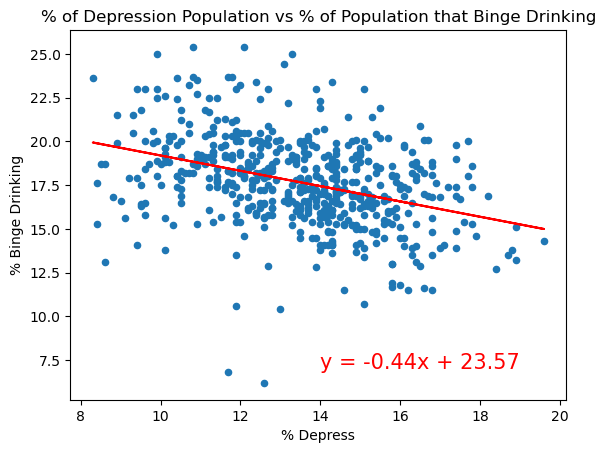

The r-value is: -0.3683445074767244


In [10]:
# Plot scatter plot
x_values = depress_drinking_df['% Depress']
y_values = depress_drinking_df['% Binge Drinking']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
depress_drinking_df.plot(kind='scatter', x='% Depress', y='% Binge Drinking', title="% of Depression Population vs % of Population that Binge Drinking")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,7),fontsize=15,color="red")
plt.savefig("Output/depressionVsDrinking.jpg")
plt.show()
print(f"The r-value is: {rvalue}")


### Comment:
The correlation between depress population and binge drinking is -0.37. This is a weak correlation.

## Kent: Depression vs Sleeping behavior

In [11]:
# Add sleeping data
sleeping_base_url = "https://data.cdc.gov/resource/eqbn-8mpz.json?"
params = {
    "GeographicLevel" : "City",
    "DataValueTypeID" : "AgeAdjPrv"
}
sleeping_data = requests.get(sleeping_base_url, params = params).json()
pprint(sleeping_data)

[{'category': 'Unhealthy Behaviors',
  'categoryid': 'UNHBEH',
  'cityfips': '2205000',
  'cityname': 'Baton Rouge',
  'data_value': '38.6',
  'data_value_type': 'Age-adjusted prevalence',
  'data_value_unit': '%',
  'datasource': 'BRFSS',
  'datavaluetypeid': 'AgeAdjPrv',
  'geographiclevel': 'City',
  'geolocation': {'human_address': '{"address": "", "city": "", "state": "", '
                                   '"zip": ""}',
                  'latitude': '30.4510891679',
                  'longitude': '-91.1263551997',
                  'needs_recoding': False},
  'high_confidence_limit': '38.8',
  'low_confidence_limit': '38.4',
  'measure': 'Sleeping less than 7 hours among adults aged >=18 Years',
  'measureid': 'SLEEP',
  'populationcount': '229493',
  'short_question_text': 'Sleep <7 hours',
  'stateabbr': 'LA',
  'statedesc': 'Louisiana',
  'uniqueid': '2205000',
  'year': '2016'},
 {'category': 'Unhealthy Behaviors',
  'categoryid': 'UNHBEH',
  'cityfips': '2270000',
  'cityna

In [12]:
# Create the dataframe
sleeping_df = pd.DataFrame()
sleeping_df['City Name'] = ""
sleeping_df['% Sleep'] = ""

for x in range(len(sleeping_data)):
    sleeping_df.loc[x,'City Name'] = sleeping_data[x]['cityname']
    sleeping_df.loc[x, '% Sleep'] = sleeping_data[x]['data_value']

sleeping_df.head()

,City Name,% Sleep
0,Baton Rouge,38.6
1,Shreveport,38.6
2,Sugar Land,31.8
3,Spokane,32.7
4,Gilbert,33.6


In [21]:
# Merge 2 datasets together
depress_sleeping_df = pd.merge(mental_df, sleeping_df, on='City Name')
depress_sleeping_df['% Sleep'] = depress_sleeping_df['% Sleep'].astype("float")
depress_sleeping_df.dtypes
depress_sleeping_df.head()

,City Name,State,Lat,Lon,% Depress,% Sleep
0,Mobile,AL,30.677625,-88.118448,16.3,39.7
1,Gilbert,AZ,33.310149,-111.746237,10.9,33.6
2,Avondale,AZ,33.385837,-112.323627,13.5,37.3
3,Montgomery,AL,32.347265,-86.267706,15.8,38.1
4,Anchorage,AK,61.149869,-149.111113,11.0,30.7


In [22]:
map_plot_K = depress_sleeping_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "% Sleep",
    colormap = "coolwarm"
)
hvplot.save(map_plot_K, 'Output/SleepingMap.png')
map_plot_K

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (% Sleep)

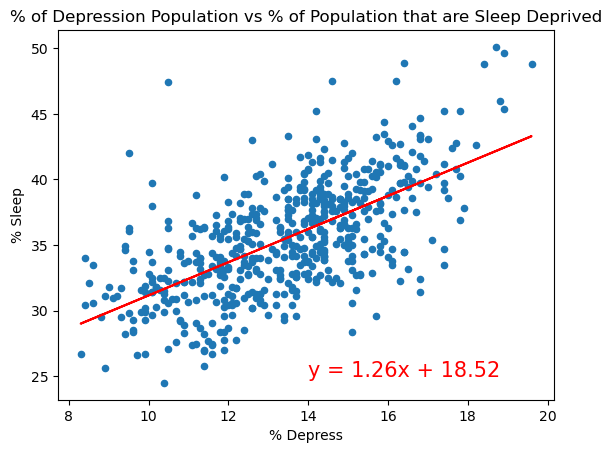

The r-value is: 0.6350483209947062


In [14]:
# Add regression line
x_values = depress_sleeping_df['% Depress']
y_values = depress_sleeping_df['% Sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
depress_sleeping_df.plot(kind='scatter', x='% Depress', y='% Sleep', title="% of Depression Population vs % of Population that are Sleep Deprived")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,25),fontsize=15,color="red")
plt.savefig("Output/depressionVsSleep.jpg")
plt.show()
print(f"The r-value is: {rvalue}")

### Comment:
There is a moderate correlation between depression and lack of sleep. Citizens of more depressing cities also tend to sleep less than 7 hours per day.

## Esther: Depress vs Physical Inactivity

In [24]:
# Get No Leisure time for Physical Activity data
no_leisure_url = "https://data.cdc.gov/resource/axqz-rkkp.json"
params = {
    "GeographicLevel" : "City",
    "DataValueTypeID" : "AgeAdjPrv"

}
leisure_data = requests.get(no_leisure_url, params=params).json()

print(json.dumps(leisure_data, indent=4, sort_keys=True))

[
    {
        "category": "Unhealthy Behaviors",
        "categoryid": "UNHBEH",
        "cityfips": "0877290",
        "cityname": "Thornton",
        "data_value": "22.0",
        "data_value_type": "Age-adjusted prevalence",
        "data_value_unit": "%",
        "datasource": "BRFSS",
        "datavaluetypeid": "AgeAdjPrv",
        "geographiclevel": "City",
        "geolocation": {
            "human_address": "{\"address\": \"\", \"city\": \"\", \"state\": \"\", \"zip\": \"\"}",
            "latitude": "39.9193994188",
            "longitude": "-104.944956758",
            "needs_recoding": false
        },
        "high_confidence_limit": "22.4",
        "low_confidence_limit": "21.6",
        "measure": "No leisure-time physical activity among adults aged >=18 Years",
        "measureid": "LPA",
        "populationcount": "118772",
        "short_question_text": "Physical Inactivity",
        "stateabbr": "CO",
        "statedesc": "Colorado",
        "uniqueid": "0877290",


In [25]:
# Create leisure_time_df
leisure_time_df = pd.DataFrame()
leisure_time_df["City Name"] = ""
leisure_time_df["% No Leisure Time for Physical Activity"] = ""

for x in range(len(leisure_data)):
    leisure_time_df.loc[x, "City Name"] = leisure_data[x]["cityname"]
    leisure_time_df.loc[x, "% No Leisure Time for Physical Activity"] = leisure_data[x]["data_value"]

leisure_time_df.head()

,City Name,% No Leisure Time for Physical Activity
0,Thornton,22.0
1,Kansas City,39.3
2,Independence,29.8
3,San Antonio,34.8
4,Virginia Beach,23.7


In [26]:
complete_df = pd.merge(mental_df, leisure_time_df, on="City Name")
complete_df["% Depress"] = complete_df["% Depress"].astype(float)
complete_df["% No Leisure Time for Physical Activity"] = complete_df["% No Leisure Time for Physical Activity"].astype(float)
complete_df.head()

,City Name,State,Lat,Lon,% Depress,% No Leisure Time for Physical Activity
0,Mobile,AL,30.677625,-88.118448,16.3,35.7
1,Gilbert,AZ,33.310149,-111.746237,10.9,19.6
2,Avondale,AZ,33.385837,-112.323627,13.5,28.3
3,Montgomery,AL,32.347265,-86.267706,15.8,35.1
4,Anchorage,AK,61.149869,-149.111113,11.0,21.4


In [27]:
map_plot_E = complete_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "% No Leisure Time for Physical Activity",
    colormap = "coolwarm"
)
hvplot.save(map_plot_E, 'Output/InactivityMap.png')
map_plot_E

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (% No Leisure Time for Physical Activity)

The r-value is 0.7272456795661382


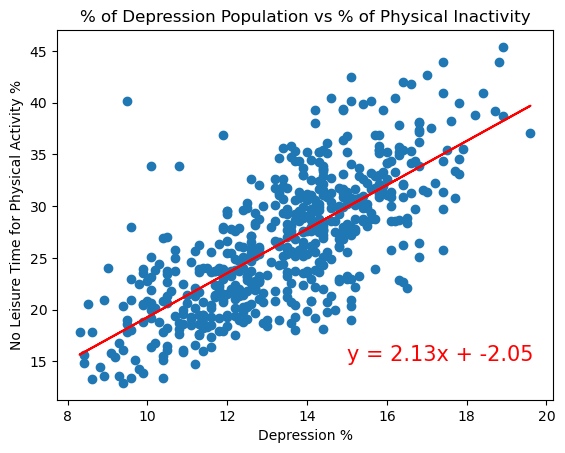

In [28]:
#Building a scatter plot for depression values and % No Leisure Time for physical Activity
x_values = complete_df["% Depress"]
y_values = complete_df["% No Leisure Time for Physical Activity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, 'r')

plt.scatter(x_values, y_values)
plt.title("% of Depression Population vs % of Physical Inactivity")
plt.xlabel("Depression %")
plt.ylabel("No Leisure Time for Physical Activity %")
plt.text(15,15, f"y = {round(slope,2)}x + {round(intercept, 2)}", fontsize=15, color='r')

#show plot
print(f"The r-value is {rvalue}")
plt.savefig("Output/depressionVsPhysical.jpg")
plt.show()

### Comment: 
There is a strong correlation between depression and physical inactivity. People from more depressing states are more likely to have no leisure time for physical activities.

## Alice, Kent and Esther: Ranking the cities and states base on depression rate

In [29]:
# Top 5 depressing city
depress_cities = depress_drinking_df.sort_values('% Depress', ascending=False).reset_index(drop=True)
depress_cities = depress_cities.loc[0:4,['City Name','% Depress','Lat','Lon']]
depress_cities


,City Name,% Depress,Lat,Lon
0,Flint,19.6,43.023634,-83.692064
1,Reading,18.9,40.339968,-75.926613
2,Camden,18.9,39.936191,-75.107296
3,Youngstown,18.8,41.099329,-80.646319
4,Detroit,18.7,42.384702,-83.105318


In [31]:
# Put most depressing cities in a list
depress_cities_list = []
for x in range (5):
    depress_cities_list.append(depress_cities.loc[x,'City Name'])
print(depress_cities_list)

['Flint', 'Reading', 'Camden', 'Youngstown', 'Detroit']


In [32]:
# Top 5 happiest city
happy_cities = depress_drinking_df.sort_values('% Depress').reset_index(drop=True)
happy_cities = happy_cities.loc[0:4,['City Name','% Depress','Lat','Lon']]
happy_cities

,City Name,% Depress,Lat,Lon
0,Plymouth,8.3,45.022463,-93.461602
1,Sunnyvale,8.4,37.383442,-122.025624
2,Fremont,8.4,37.527869,-121.984122
3,Johns Creek,8.5,34.033299,-84.202720
4,San Ramon,8.6,37.762371,-121.938150


In [33]:
# Put happiest cities in a list
happy_cities_list = []
for x in range (5):
    happy_cities_list.append(happy_cities.loc[x,'City Name'])
print(happy_cities_list)

['Plymouth', 'Sunnyvale', 'Fremont', 'Johns Creek', 'San Ramon']


In [34]:

depress_cities['% Diabetes'] = ""
depress_cities['% High Blood Pressure'] = ""
depress_cities['% Kidney Disease'] = ""
depress_cities['% Cancer'] = ""
depress_cities['% Lack Insurance'] = ""
depress_cities['Type'] = "Depress"

depress_cities

,City Name,% Depress,Lat,Lon,% Diabetes,% High Blood Pressure,% Kidney Disease,% Cancer,% Lack Insurance,Type
0,Flint,19.6,43.023634,-83.692064,,,,,,Depress
1,Reading,18.9,40.339968,-75.926613,,,,,,Depress
2,Camden,18.9,39.936191,-75.107296,,,,,,Depress
3,Youngstown,18.8,41.099329,-80.646319,,,,,,Depress
4,Detroit,18.7,42.384702,-83.105318,,,,,,Depress


In [35]:
diabetes_url = "https://data.cdc.gov/resource/cn78-b9bj.json?"
high_blood_pressure_url = "https://data.cdc.gov/resource/ebxs-yc6e.json?"
kidney_disease_url = "https://data.cdc.gov/resource/dnkc-3whb.json?"
cancer_url = "https://data.cdc.gov/resource/9f46-utxd.json?"
insurance_url = "https://data.cdc.gov/resource/8dbf-5cp2.json?"

for index, row in depress_cities.iterrows():
    city = depress_cities.loc[index,"City Name"]
    params['CityName']=city
    # Get diabetes data
    diabetes = requests.get(diabetes_url, params=params).json()
    depress_cities.loc[index, "% Diabetes"] = diabetes[0]['data_value']
    # Get high blood pressure data
    blood_pressure = requests.get(high_blood_pressure_url, params=params).json()
    depress_cities.loc[index, "% High Blood Pressure"] = blood_pressure[0]['data_value']
    # Get kidney disease data
    kidney_disease = requests.get(kidney_disease_url, params=params).json()
    depress_cities.loc[index, "% Kidney Disease"] = kidney_disease[0]['data_value']
    # Get cancer data
    cancer = requests.get(cancer_url, params=params).json()
    depress_cities.loc[index, "% Cancer"] = cancer[0]['data_value']
    # Get insurance data
    insurance = requests.get(insurance_url, params=params).json()
    depress_cities.loc[index, "% Lack Insurance"] = insurance[0]['data_value']


depress_cities

,City Name,% Depress,Lat,Lon,% Diabetes,% High Blood Pressure,% Kidney Disease,% Cancer,% Lack Insurance,Type
0,Flint,19.6,43.023634,-83.692064,17.2,45.4,4.5,6.1,17.2,Depress
1,Reading,18.9,40.339968,-75.926613,16.0,35.0,4.3,5.9,23.8,Depress
2,Camden,18.9,39.936191,-75.107296,20.3,43.5,4.6,5.3,27.6,Depress
3,Youngstown,18.8,41.099329,-80.646319,16.8,40.1,4.2,5.9,17.9,Depress
4,Detroit,18.7,42.384702,-83.105318,18.0,46.7,4.8,5.7,19.0,Depress


In [36]:
happy_cities['% Diabetes'] = ""
happy_cities['% High Blood Pressure'] = ""
happy_cities['% Kidney Disease'] = ""
happy_cities['% Cancer'] = ""
happy_cities['% Lack Insurance'] = ""
happy_cities['Type'] = "Happy"

happy_cities

,City Name,% Depress,Lat,Lon,% Diabetes,% High Blood Pressure,% Kidney Disease,% Cancer,% Lack Insurance,Type
0,Plymouth,8.3,45.022463,-93.461602,,,,,,Happy
1,Sunnyvale,8.4,37.383442,-122.025624,,,,,,Happy
2,Fremont,8.4,37.527869,-121.984122,,,,,,Happy
3,Johns Creek,8.5,34.033299,-84.202720,,,,,,Happy
4,San Ramon,8.6,37.762371,-121.938150,,,,,,Happy


In [37]:
for index, row in happy_cities.iterrows():
    city = happy_cities.loc[index,"City Name"]
    params['CityName']=city
    # Get diabetes data
    diabetes = requests.get(diabetes_url, params=params).json()
    happy_cities.loc[index, "% Diabetes"] = diabetes[0]['data_value']
    # Get high blood pressure data
    blood_pressure = requests.get(high_blood_pressure_url, params=params).json()
    happy_cities.loc[index, "% High Blood Pressure"] = blood_pressure[0]['data_value']
    # Get kidney disease data
    kidney_disease = requests.get(kidney_disease_url, params=params).json()
    happy_cities.loc[index, "% Kidney Disease"] = kidney_disease[0]['data_value']
    # Get cancer data
    cancer = requests.get(cancer_url, params=params).json()
    happy_cities.loc[index, "% Cancer"] = cancer[0]['data_value']
    # Get insurance data
    insurance = requests.get(insurance_url, params=params).json()
    happy_cities.loc[index, "% Lack Insurance"] = insurance[0]['data_value']


happy_cities

,City Name,% Depress,Lat,Lon,% Diabetes,% High Blood Pressure,% Kidney Disease,% Cancer,% Lack Insurance,Type
0,Plymouth,8.3,45.022463,-93.461602,5.6,21.1,2.2,6.4,7.9,Happy
1,Sunnyvale,8.4,37.383442,-122.025624,7.5,23.7,2.3,5.6,8.4,Happy
2,Fremont,8.4,37.527869,-121.984122,7.6,22.4,2.3,5.3,8.6,Happy
3,Johns Creek,8.5,34.033299,-84.202720,7.0,23.5,2.2,6.1,13.1,Happy
4,San Ramon,8.6,37.762371,-121.938150,6.6,20.7,2.1,5.9,6.2,Happy


### Comment: 
Cities with happier population aslo has lower percentage of diabetes, high blood pressure, kidney disease and cancer. They also more likely to have insurance. This might be because of higher awareness about heath.
People without job cannot have insurance.

In [38]:
# Add 2 dataframes together and map
happy_and_depress = pd.concat([happy_cities, depress_cities])
map_plot_3 = happy_and_depress.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "Type",
    size = 100,
    hover_cols = ['% Depress','% Diabetes','% High Blood Pressure','% Kidney Disease','% Cancer','% Lack Insurance	']
)
hvplot.save(map_plot_3, "Output/HappyAndDepress.png")
map_plot_3


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Type,% Depress,% Diabetes,% High Blood Pressure,% Kidney Disease,% Cancer)

In [33]:
# States with the lowest rates of deperession based on average amount for each city listed. 
states_average = complete_df.groupby(complete_df["State"]).mean()
states_depression = states_average.sort_values("% Depress")
lowest_depression = states_depression["% Depress"].head(10)
lowest_depression

C:\Users\Alice Nguyen\AppData\Local\Temp\ipykernel_13032\2892370234.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states_average = complete_df.groupby(complete_df["State"]).mean()


State
MN    10.230000
HI    10.500000
ND    10.700000
SD    10.950000
AK    11.000000
DC    11.100000
NE    11.500000
WY    11.600000
CO    11.870588
CA    12.281395
Name: % Depress, dtype: float64

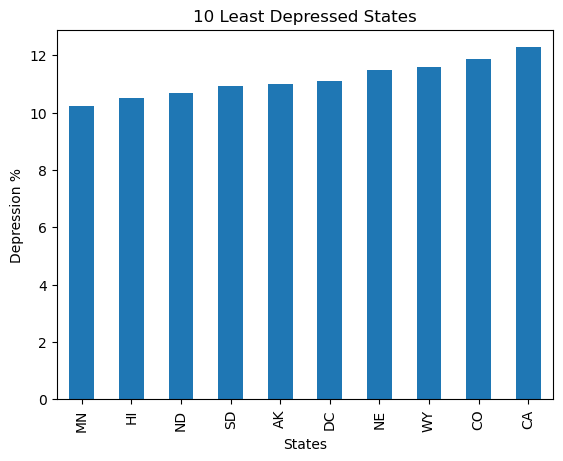

In [37]:
#Bottom 10 States for Depression %
lowest_depression.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("Depression %")
plt.title("10 Least Depressed States")
plt.savefig("Output/Bot10StatesDepress.jpg")
plt.show()

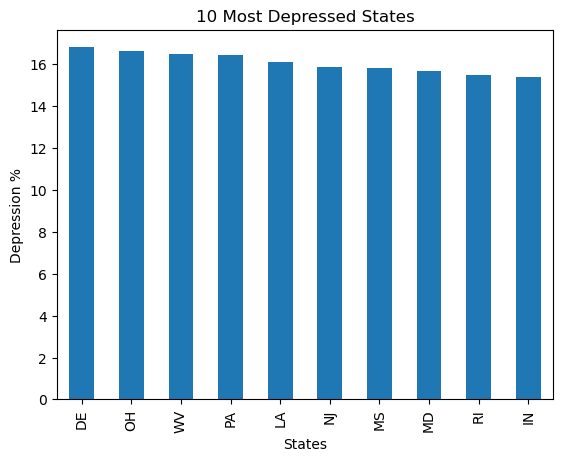

In [38]:
#Top 10 States for Depression %
highest_depression = states_average.sort_values(by="% Depress", ascending=False)
highest_depression = highest_depression["% Depress"].head(10)

highest_depression.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("Depression %")
plt.title("10 Most Depressed States")
plt.savefig("Output/Top10StatesDepress.jpg")
plt.show()

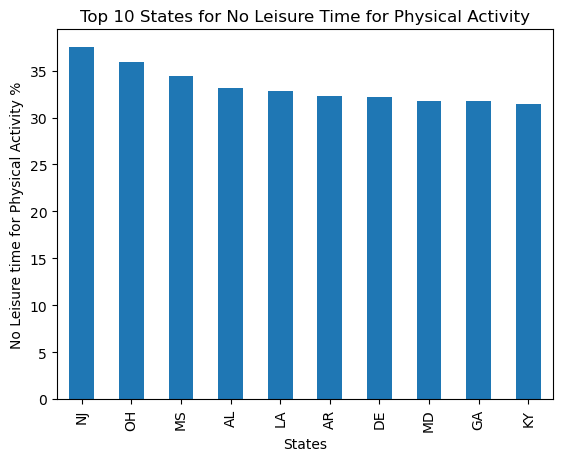

In [44]:
#Top 10 states for percentage of people with no leisure time for physical activity
highest_no_leisure = states_average.sort_values(by="% No Leisure Time for Physical Activity", ascending=False)
highest_no_leisure = highest_no_leisure["% No Leisure Time for Physical Activity"].head(10)

#Bar Graph of Data
highest_no_leisure.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("No Leisure time for Physical Activity %")
plt.title("Top 10 States for No Leisure Time for Physical Activity")
plt.savefig("Output/Bot10StatesInactivity.jpg")
plt.show()